### LIA Highschool students Analysis

Loading Libraries

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys, os

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 70)

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from cleaner import *
from visualizer import *


Loading Data

In [226]:
df = pd.read_csv(r"../data/msv6.csv")
df.head()

,name,conduct,age,gender,nationality,pob,tutor/makeup,grade,admission,guardian,time_with_parents,communication_with_parents,reward_for_achievements,parent_understanding,transport_type,residence,travel time,birth_order,exercice,previous_school,mother_tongue,curriculum,sleeping time_in_pm,parenting_style,trauma,type,quality,English,Amharic,Arabic,Geez,ICT,Maths,SS,GP,IS,Moral,HPE,Art,Chemistry,Physics,GPA
0,Abem Ashenafi Assefa,A,10.0,F,Ethiopian,Ethiopia,yes,5,Paid,both,a lot,strongly agree,strongly agree,agree,private,Ayer Tena,15-30,middle child,2,Diamond,amharic,yes,8.0,authoritative,0,none,4.25,94.86,94.58,88.45,84.41,88.52,76.38,85.93,95.00,82.01,98.28,95.48,89.00,NaN,NaN,89.4
1,Abiya Zerihun Alemu,B,12.0,M,Ethiopian,Ethiopia,no,5,Scholarship,both,little,strongly agree,strongly agree,agree,public,haile garment,15-30,first child,0,Southwest,amharic,yes,10.0,authoritative,0,none,4.00,74.12,77.39,81.86,80.98,76.90,74.92,70.32,94.75,74.16,89.84,96.15,91.75,NaN,NaN,81.9
2,Aman Dilu Shaleka,A,10.0,M,Ethiopian,Ethiopia,yes,5,Paid,both,a lot,agree,strongly agree,strongly agree,private,Sarbet,15-,last child,3,Greek,amharic,yes,9.0,authoritative,1,Physical,4.25,80.12,86.58,95.04,74.69,95.52,84.33,81.42,93.75,85.45,91.61,94.39,91.75,NaN,NaN,87.9
3,Barok Bahiru Hunde,C,11.0,M,Ethiopian,Addis Ababa,no,5,Paid,both,a lot,strongly agree,strongly agree,strongly agree,private,Gulele,15-30,last child,2,Gibson,amharic,no,8.0,authoritative,0,none,4.50,82.67,91.68,89.64,86.70,87.81,90.63,81.14,82.50,80.86,81.91,93.89,81.00,NaN,NaN,85.9
4,Bethany Yilkal,B,11.0,F,Ethiopian,USA,no,5,Paid,mother,a lot,strongly agree,strongly agree,somehow agree,private,Meskel flower,15-30,middle child,2,School of nations,english,yes,11.5,authoritative,0,none,4.00,96.31,96.99,97.60,92.09,98.62,96.00,89.07,99.75,94.73,98.77,88.69,97.75,NaN,NaN,95.5


In [227]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'conduct', 'age', 'gender', 'nationality', 'pob',
       'tutor/makeup', 'grade', 'admission', 'guardian', 'time_with_parents',
       'communication_with_parents', 'reward_for_achievements',
       'parent_understanding', 'transport_type', 'residence', 'travel time',
       'birth_order', 'exercice', 'previous_school', 'mother_tongue',
       'curriculum', 'sleeping time_in_pm', 'parenting_style', 'trauma',
       'type', 'quality', 'english', 'amharic', 'arabic', 'geez', 'ict',
       'maths', 'ss', 'gp', 'is', 'moral', 'hpe', 'art', 'chemistry',
       'physics', 'gpa'],
      dtype='object')

In [228]:
print('Middle school students Missing Data')
df.info()

Middle school students Missing Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        115 non-null    object 
 1   conduct                     115 non-null    object 
 2   age                         115 non-null    float64
 3   gender                      115 non-null    object 
 4   nationality                 115 non-null    object 
 5   pob                         115 non-null    object 
 6   tutor/makeup                115 non-null    object 
 7   grade                       115 non-null    int64  
 8   admission                   115 non-null    object 
 9   guardian                    115 non-null    object 
 10  time_with_parents           115 non-null    object 
 11  communication_with_parents  115 non-null    object 
 12  reward_for_achievements     115 non-null    object 
 13 

#### Checking Missing Values

In [229]:
df.isna().sum()

name                           0
conduct                        0
age                            0
gender                         0
nationality                    0
pob                            0
tutor/makeup                   0
grade                          0
admission                      0
guardian                       0
time_with_parents              0
communication_with_parents     0
reward_for_achievements        0
parent_understanding           0
transport_type                 0
residence                      1
travel time                    0
birth_order                    1
exercice                       0
previous_school                0
mother_tongue                  0
curriculum                     0
sleeping time_in_pm            0
parenting_style                1
trauma                         0
type                           1
quality                        0
english                        0
amharic                        0
arabic                         0
geez      

In [230]:
cleaner.percent_missing(df)

The dataset contains 2.19 % missing values.


#### Filling Missing Values

most missing values has been filled manualy by directly approaching the students through thier deans and unit leaders. Currently The data frame has 4.4 missing values. These will be filled using different mechanisms like mean, median , mode, forward and backward fixing methods.

In [231]:
#mean_value=df['sleeping time_in_pm'].mean()
#mean_value
#df['sleeping time_in_pm '].fillna(value=mean_value, inplace=True) 

In [232]:
cleaner.percent_missing(df)

The dataset contains 2.19 % missing values.


In [233]:
df['parenting_style'].fillna(df['parenting_style'].mode()[0], inplace=True)
df['time_with_parents'].fillna(df['time_with_parents'].mode()[0], inplace=True)
df['communication_with_parents'].fillna(df['communication_with_parents'].mode()[0], inplace=True)
df['reward_for_achievements'].fillna(df['reward_for_achievements'].mode()[0], inplace=True)
df['parent_understanding'].fillna(df['parent_understanding'].mode()[0], inplace=True)
df['travel time'].fillna(df['travel time'].mode()[0], inplace=True)
df['mother_tongue'].fillna(df['mother_tongue'].mode()[0], inplace=True)
df['curriculum'].fillna(df['curriculum'].mode()[0], inplace=True)
df['trauma'].fillna(df['trauma'].mode()[0], inplace=True)
df['exercice'].fillna(df['exercice'].mode()[0], inplace=True)
df['type'].fillna(df['type'].mode()[0], inplace=True)
df['sleeping time_in_pm'].fillna(df['sleeping time_in_pm'].mode()[0], inplace=True)
df['residence'].fillna(df['residence'].mode()[0], inplace=True)
df['birth_order'].fillna(df['birth_order'].mode()[0], inplace=True)
df['hpe'].fillna(df['hpe'].mean(), inplace=True)


##### filling missing values has been completed using mode for categorical variables.

In [234]:
df['ict'].fillna(df['ict'].mean(), inplace=True)
df['art'].fillna(df['art'].mean(), inplace=True)

In [235]:
cleaner.percent_missing(df)

The dataset contains 2.03 % missing values.


#####  Saving version3 of data into csv

In [236]:
#df.to_csv('HS_nomv.csv', index=False)

In [237]:
df.isna().sum()


name                           0
conduct                        0
age                            0
gender                         0
nationality                    0
pob                            0
tutor/makeup                   0
grade                          0
admission                      0
guardian                       0
time_with_parents              0
communication_with_parents     0
reward_for_achievements        0
parent_understanding           0
transport_type                 0
residence                      0
travel time                    0
birth_order                    0
exercice                       0
previous_school                0
mother_tongue                  0
curriculum                     0
sleeping time_in_pm            0
parenting_style                0
trauma                         0
type                           0
quality                        0
english                        0
amharic                        0
arabic                         0
geez      

In [238]:
df.dtypes

name                           object
conduct                        object
age                           float64
gender                         object
nationality                    object
pob                            object
tutor/makeup                   object
grade                           int64
admission                      object
guardian                       object
time_with_parents              object
communication_with_parents     object
reward_for_achievements        object
parent_understanding           object
transport_type                 object
residence                      object
travel time                    object
birth_order                    object
exercice                        int64
previous_school                object
mother_tongue                  object
curriculum                     object
sleeping time_in_pm           float64
parenting_style                object
trauma                          int64
type                           object
quality     

In [239]:
df['hpe'] = pd.to_numeric(df['hpe'])

In [240]:
df['travel time'].value_counts()
df['travel time'] = df['travel time'].astype("string")

In [241]:
for i in df.columns:
    if df[i].dtype == 'O':
        df[i] = df[i].astype("string")

In [242]:
df.dtypes

name                           string
conduct                        string
age                           float64
gender                         string
nationality                    string
pob                            string
tutor/makeup                   string
grade                           int64
admission                      string
guardian                       string
time_with_parents              string
communication_with_parents     string
reward_for_achievements        string
parent_understanding           string
transport_type                 string
residence                      string
travel time                    string
birth_order                    string
exercice                        int64
previous_school                string
mother_tongue                  string
curriculum                     string
sleeping time_in_pm           float64
parenting_style                string
trauma                          int64
type                           string
quality     

In [243]:
df.isna().sum()

name                           0
conduct                        0
age                            0
gender                         0
nationality                    0
pob                            0
tutor/makeup                   0
grade                          0
admission                      0
guardian                       0
time_with_parents              0
communication_with_parents     0
reward_for_achievements        0
parent_understanding           0
transport_type                 0
residence                      0
travel time                    0
birth_order                    0
exercice                       0
previous_school                0
mother_tongue                  0
curriculum                     0
sleeping time_in_pm            0
parenting_style                0
trauma                         0
type                           0
quality                        0
english                        0
amharic                        0
arabic                         0
geez      

In [244]:
df.type.dtype == 'string'

True

In [245]:
for i in df.columns:
    if df[i].dtype == 'string':
        df[i] = df[i].apply(lambda x: x.lower())

In [246]:
df['gender'].value_counts()

f    65
m    50
Name: gender, dtype: int64

In [247]:
df.conduct.value_counts()

a    84
b    21
c    10
Name: conduct, dtype: int64

In [248]:
df.nationality.value_counts()
df.nationality = df['nationality'].replace('ethiopian ', 'ethiopian')
df.nationality.value_counts()

ethiopian    94
american     19
canadian      1
british       1
Name: nationality, dtype: int64

In [249]:
df['pob'].value_counts()

ethiopia        82
usa             27
addis ababa      3
south africa     2
london           1
Name: pob, dtype: int64

In [250]:
df.pob = df['pob'].replace('addis ababa', 'ethiopia')
df['pob'].value_counts()

ethiopia        85
usa             27
south africa     2
london           1
Name: pob, dtype: int64

In [251]:
df['tutor/makeup'].value_counts()

no     62
yes    53
Name: tutor/makeup, dtype: int64

In [252]:
df.grade.value_counts()

7    37
8    30
6    26
5    22
Name: grade, dtype: int64

In [253]:
df.admission.value_counts()

paid           90
scholarship    25
Name: admission, dtype: int64

In [254]:
df.guardian.value_counts()

both      88
mother    21
other      6
Name: guardian, dtype: int64

In [255]:
df['time_with_parents'].value_counts()
df['time_with_parents'] = df['time_with_parents'].replace(' a lot', 'a lot')
df['time_with_parents'] = df['time_with_parents'].replace('little ', 'little')
df['time_with_parents'] = df['time_with_parents'].replace('a lot ', 'a lot')

In [256]:
df['time_with_parents'].value_counts()

a lot       92
little      19
not much     4
Name: time_with_parents, dtype: int64

In [257]:
df['communication_with_parents'].value_counts()

strongly agree       56
agree                39
somehow agree        15
disagree              4
strongly disagree     1
Name: communication_with_parents, dtype: int64

In [258]:
df['reward_for_achievements'].value_counts()

strongly agree       65
agree                33
somehow agree        14
strongly disagree     2
disagree              1
Name: reward_for_achievements, dtype: int64

In [259]:
df['parent_understanding'].value_counts()

strongly agree       42
agree                37
somehow agree        21
disagree             10
strongly disagree     5
Name: parent_understanding, dtype: int64

In [260]:
df.transport_type.value_counts() 

private    82
service    21
public     11
foot        1
Name: transport_type, dtype: int64

In [261]:
df.residence.value_counts()

lebu               10
sarbet              7
jemo                7
kality              6
bethel              6
german square       5
bole                4
jemo 2              4
torhailoch          4
bole atlas          4
kolfe               4
haile garment       4
ayertena            3
asco                3
bisrate gabriel     3
lafto               2
jemo 1              2
zenebework          2
jemo 3              2
anfo                2
bole bulbula        2
atena tera          2
gerji               2
meskel flower       2
gulele              2
gofa gabriel        1
kara kore           1
ayer tena           1
tulu dimtu          1
paulos              1
gelan               1
china camp          1
old airport         1
weyra               1
cmc                 1
kera                1
gotera              1
bole michael        1
kazanchis           1
mekanisa            1
ayat                1
wingate             1
welete              1
sululta             1
sefera              1
gola      

In [262]:
df.residence = df['residence'].replace('bisrate gabriel', 'sarbet')
df.residence = df['residence'].replace('jemo 2', 'jemo')
df.residence = df['residence'].replace('jemo 1', 'jemo')
df.residence = df['residence'].replace('jemo 3', 'jemo')
df.residence = df['residence'].replace('ayer tena', 'ayertena')
df.residence = df['residence'].replace('bole atlas', 'bole')

In [288]:
df.residence.unique()


array(['ayertena', 'haile garment', 'sarbet', 'gulele', 'meskel flower',
       'torhailoch', 'kality', 'german square', 'bethel', 'gerji', 'jemo',
       'lebu', 'kolfe', 'atena tera', 'bole', 'sefera', 'sululta', 'anfo',
       'welete', 'asco', 'kera', 'zenebework', 'wingate', 'lafto', 'ayat',
       'mekanisa', 'kazanchis', 'bole michael', 'gotera', 'old airport',
       'cmc', 'bole bulbula', 'gofa gabriel', 'kara kore', 'paulos',
       'gelan', 'china camp', 'tulu dimtu', 'weyra', 'gola'], dtype=object)

In [263]:
df.residence.value_counts()

jemo             15
sarbet           10
lebu             10
bole              8
kality            6
bethel            6
german square     5
haile garment     4
kolfe             4
ayertena          4
torhailoch        4
asco              3
anfo              2
bole bulbula      2
lafto             2
zenebework        2
gulele            2
gerji             2
atena tera        2
meskel flower     2
china camp        1
tulu dimtu        1
weyra             1
old airport       1
gelan             1
paulos            1
kara kore         1
gofa gabriel      1
cmc               1
kera              1
gotera            1
bole michael      1
kazanchis         1
mekanisa          1
ayat              1
wingate           1
welete            1
sululta           1
sefera            1
gola              1
Name: residence, dtype: int64

In [264]:
df['travel time'].value_counts()
df['travel time'] = df['travel time'].replace("30'60", "30-60")
df['travel time'].value_counts()

15-30    46
30-60    44
15-      14
60+      11
Name: travel time, dtype: int64

In [265]:
df.birth_order.value_counts() 

first child     52
middle child    39
last child      24
Name: birth_order, dtype: int64

In [266]:
df['exercice'].value_counts()

2    36
3    32
1    25
0    15
5     3
4     2
6     2
Name: exercice, dtype: int64

In [267]:
#Check for value ranges and make corrections
def polar(x):
    if x > 3:
        return 3
    else:
        return x
    
df.exercice = df.exercice.apply(polar)   
df.exercice.value_counts()

3    39
2    36
1    25
0    15
Name: exercice, dtype: int64

In [268]:
df['previous_school'] = df['previous_school'].replace('maarif', 'intellectual')
df['previous_school'] = df['previous_school'].replace('lycee ', 'lycee')
df['previous_school'] = df['previous_school'].replace('greek', 'greek school')
df['previous_school'] = df['previous_school'].replace('Jemo 2 Primary School', 'jemo 2')
df['previous_school'] = df['previous_school'].replace('beteseb', 'beteseb academy')
df['previous_school'] = df['previous_school'].replace('discovery','school of science')
df['previous_school'] = df['previous_school'].replace('discovery school of science ane tech','school of science')
df['previous_school'] = df['previous_school'].replace('saint francis','st francis')
df.previous_school.value_counts()[:11] 

neps                   13
intellectual           10
school of nations       8
jemo 2                  7
gibson                  7
beteseb academy         6
rice                    6
abay                    5
hilltops                4
spring of knowledge     4
flipper                 2
Name: previous_school, dtype: int64

In [269]:
#foriegn schools

foriegn_schools = ['coleridge potomac' ,'bingham','forest trail' ,'herbert hoover' ,
'old lady rivers' , 'st francis' , 'apillo' , 'hieman', 'discovery', 'bicolos']



In [270]:
df[df.previous_school == 'school of science'][['nationality', 'pob', 'admission', 'previous_school']]

,nationality,pob,admission,previous_school
46,american,usa,paid,school of science
87,american,ethiopia,paid,school of science


In [271]:
df[df.previous_school == 'diamond'] [['nationality', 'pob', 'admission', 'previous_school']]

,nationality,pob,admission,previous_school
0,ethiopian,ethiopia,paid,diamond


In [272]:
df.previous_school.unique()

array(['diamond', 'southwest', 'greek school', 'gibson',
       'school of nations', 'neps', 'potomac', 'cambridge',
       'spring of knowledge', 'forest trail', 'intellectual', 'renence',
       'st francis', 'rice', 'hilltops', 'apillo', 'beteseb academy',
       'old lady rivers', 'st joseph', 'coleridge', 'jemo 2', 'unity',
       'lion heart', 'school of tomorrow', 'bikolos', 'stanford',
       'school of science', 'hieman', 'lelisies talent', 'meseret edget',
       'biruh tesfa', 'herbert hoover', 'one planet', 'bgis',
       'prestigious youth', 'abay', 'lycee', 'flipper', 'kb academy',
       'lesperance', 'akaki kality menbere', 'netsanet chora', 'emmanuel',
       'bingham', 'future talent', 'kotari', 'nowzes', 'online'],
      dtype=object)

In [273]:
df.mother_tongue.value_counts()
df['mother_tongue'] = df['mother_tongue'].replace('engish', 'english')
df['mother_tongue'] = df['mother_tongue'].replace('english', 'for-lang')
df['mother_tongue'] = df['mother_tongue'].replace('arabic', 'for-lang')
df['mother_tongue'] = df['mother_tongue'].replace('norwegian', 'for-lang')
df['mother_tongue'] = df['mother_tongue'].replace('afan oromo', 'eth-lang')
df['mother_tongue'] = df['mother_tongue'].replace('amharic', 'eth-lang')
df.mother_tongue.value_counts()

eth-lang    90
for-lang    25
Name: mother_tongue, dtype: int64

In [274]:
df['curriculum'].value_counts()

yes    81
no     34
Name: curriculum, dtype: int64

In [275]:
#df['sleeping time_in_pm'].value_counts()

In [276]:
df.parenting_style.value_counts()

authoritative    78
authoritarian    28
permissive        5
authoriattive     2
uninvolved        1
authoriative      1
Name: parenting_style, dtype: int64

In [277]:
df['parenting_style'] = df['parenting_style'].replace('authoriattive', 'authoritative')
df['parenting_style'] = df['parenting_style'].replace('authoriative', 'authoritative')


In [278]:
df.parenting_style.value_counts()

authoritative    81
authoritarian    28
permissive        5
uninvolved        1
Name: parenting_style, dtype: int64

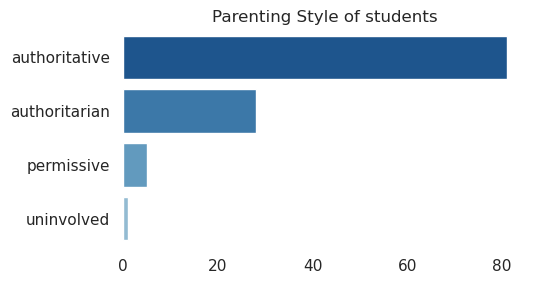

In [279]:
sns.set(rc={'figure.figsize':(5.2,2.8)})
sns.set_palette("Blues_r")
sns.set_style("white")
ax = sns.countplot(data = df, y='parenting_style', order=df['parenting_style'].value_counts().index)
sns.despine(bottom=True, left=True)
plt.ylabel("", size=10)
plt.xlabel("", size=10)
plt.title("Parenting Style of students")
ax.tick_params(bottom=False)
ax.tick_params(left=False)

In [280]:
df.trauma.value_counts()

0    84
1    31
Name: trauma, dtype: int64

In [281]:
df.type.value_counts()

none             94
emotional         7
physical          5
physcological     2
phy               2
emopsy            1
emoxpsy           1
phyemo            1
phyemopsy         1
psyemo            1
Name: type, dtype: int64

In [282]:
df.gpa.mean()

88.09478260869567

In [283]:
df.quality.mean()

3.8195652173913044

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        115 non-null    object 
 1   conduct                     115 non-null    object 
 2   age                         115 non-null    float64
 3   gender                      115 non-null    object 
 4   nationality                 115 non-null    object 
 5   pob                         115 non-null    object 
 6   tutor/makeup                115 non-null    object 
 7   grade                       115 non-null    int64  
 8   admission                   115 non-null    object 
 9   guardian                    115 non-null    object 
 10  time_with_parents           115 non-null    object 
 11  communication_with_parents  115 non-null    object 
 12  reward_for_achievements     115 non-null    object 
 13  parent_understanding        115 non

In [285]:
df[df.duplicated()==True]
#no duplicate values

,name,conduct,age,gender,nationality,pob,tutor/makeup,grade,admission,guardian,time_with_parents,communication_with_parents,reward_for_achievements,parent_understanding,transport_type,residence,travel time,birth_order,exercice,previous_school,mother_tongue,curriculum,sleeping time_in_pm,parenting_style,trauma,type,quality,english,amharic,arabic,geez,ict,maths,ss,gp,is,moral,hpe,art,chemistry,physics,gpa


In [286]:
cleaner.percent_missing(df)

The dataset contains 2.03 % missing values.
